In [274]:
import numpy as np 

all_subs     = np.array([])
all_pred     = np.array([])
all_dx       = np.array([])
# import os
# print (os.getcwd())

for i in range(5):
    all_subs = np.concatenate((all_subs, np.genfromtxt('../5cv/subid_' + str(i+1) + '.txt', dtype='str')))
    all_dx = np.concatenate([all_dx,  np.loadtxt('../5cv/dx_' + str(i+1) + '.txt')]) 
    all_pred = np.concatenate([all_pred,  np.loadtxt('../5cv/pred_' + str(i+1) + '.txt')]) 

In [275]:
all_subs.shape[0]

8144

In [277]:
import pandas as pd
from functools import reduce

#all_subjects = all_subjects[0:7282]
#all_dx = all_dx[0:7282]

demog = pd.read_csv('../abcd_ssphp01.csv')
all_demog = demog[demog.subjectkey.isin(all_subjects) & demog.eventname.isin(['baseline_year_1_arm_1'])]

demog2 = pd.read_csv('../pdem02.csv', encoding = "ISO-8859-1")
all_demog2 = demog2[demog2.subjectkey.isin(all_subjects)]

cogsco = pd.read_csv('../abcd_ps01.csv')
all_cogsco = cogsco[cogsco.subjectkey.isin(all_subjects)]

nihtbx = pd.read_csv('../abcd_tbss01.csv')
all_nihtbx = nihtbx[nihtbx.subjectkey.isin(all_subjects)]

nihtbx = pd.read_csv('../cct01.csv')
all_cashc = nihtbx[nihtbx.subjectkey.isin(all_subjects)]

nihtbx = pd.read_csv('../lmtp201.csv')
all_lmt = nihtbx[nihtbx.subjectkey.isin(all_subjects)]

#preds = pd.DataFrame({'subjectkey': all_subjects, 'pred': all_pred, 'dx': all_dx, 'features': np.empty(all_dx.shape[0])}, columns=['subjectkey', 'pred', 'dx', 'features'])
preds = pd.DataFrame({'subjectkey': all_subs, 'pred': all_pred}, columns=['subjectkey', 'pred'])
#fdf = pd.concat([pd.DataFrame(all_features), pd.DataFrame({'subjectkey': all_subjects}, columns=['subjectkey'])], axis=1)


dfs = [all_demog, all_demog2, all_cogsco, all_nihtbx, all_cashc, all_lmt, preds, fdf]
all_info3 = reduce(lambda left,right: pd.merge(left,right,on='subjectkey'), dfs)

C:\Users\E31195\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,5,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\E31195\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,128,129,130,131) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=intera

In [287]:
all_info3.shape

(3854, 8612)

In [285]:
from scipy.stats.stats import pearsonr

# num_features = 8192
pds = np.nan_to_num(pd.to_numeric(all_info3.pds_p_ss_male_category)) + np.nan_to_num(pd.to_numeric(all_info3.pds_p_ss_female_category))
age = np.nan_to_num(pd.to_numeric(all_info3.interview_age_x))
ses = np.nan_to_num(pd.to_numeric(all_info3.demo_prtnr_ed_v2))

sexxx = all_info3.sex_x;
sex = np.empty([sexxx.shape[0]])
for i in range(sex.shape[0]):
    if sexxx[i] == 'M':
        sex[i]= 0
    elif sexxx[i] == 'F':
        sex[i]= 1
    else:
        print ('Sex unknown!')

# pvals_features_pds = np.empty([num_features])
# pvals_features_age = np.empty([num_features])
# pvals_features_ses = np.empty([num_features])
# pvals_features_sex = np.empty([num_features])

# for i in range(num_features):
#     pds_r, pvals_features_pds[i] = pearsonr(pds, all_info3.iloc[:,i+174])
#     age_r, pvals_features_age[i] = pearsonr(age, all_info3.iloc[:,i+174])
#     ses_r, pvals_features_ses[i] = pearsonr(ses, all_info3.iloc[:,i+174])
#     sex_r, pvals_features_sex[i] = pearsonr(sex, all_info3.iloc[:,i+174])

In [288]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib as mpl 

import matplotlib.pyplot as plt 
from scipy import stats

In [363]:
# test anything you want across sexes
aaa = np.nan_to_num(pd.to_numeric(all_info3.pea_wiscv_trs))

a = aaa[sex==1]
print(np.mean(a), np.std(a))

b = aaa[sex==0]
print(np.mean(b), np.std(b))

print(np.sum(a==1)/(np.sum(a==1)+np.sum(a==2)))
print(np.sum(a==2)/(np.sum(a==1)+np.sum(a==2)))

print(np.sum(b==1)/(np.sum(b==1)+np.sum(b==2)))
print(np.sum(b==2)/(np.sum(b==1)+np.sum(b==2)))

[sss, p] = stats.ttest_ind(a, b)

print ('%2.20f' % p)

17.867102396514163 5.102093475704935
17.4603567888999 5.080976029742966
nan
nan
nan
nan
0.01330917385780057069


C:\Users\E31195\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':
C:\Users\E31195\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\E31195\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
C:\Users\E31195\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


In [442]:
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import (
    LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

0.00000000000000000000


C:\Users\E31195\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


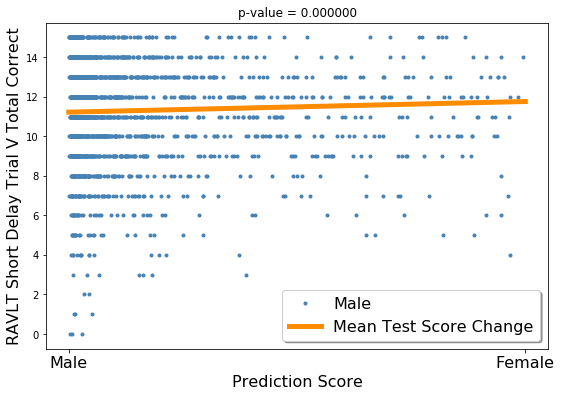

In [485]:
# ss = 'pea_wiscv_trs'
# s = 'WISC-V Matrix Reasoning Total Raw Score'

ss = 'pea_ravlt_sd_trial_v_tc'
s = 'RAVLT Short Delay Trial V Total Correct'

# ss = 'lmt_scr_perc_correct'
# s = 'Little Man Task Accuracy'

# ss = 'nihtbx_picvocab_agecorrected'
# s = 'NIH Toolbox Picture Vocabulary Test®'

# ss = 'nihtbx_flanker_agecorrected'
# s = 'NIH Toolbox Flanker®'

# ss = 'nihtbx_list_agecorrected'
# s = 'NIH Toolbox Flanker®'

# ss = 'nihtbx_list_agecorrected'
# s = 'NIH Toolbox List Sorting Working Memory Test®'

# ss = 'nihtbx_cardsort_agecorrected'
# s = 'NIH Toolbox Dimensional Change Card Sort®'

# ss = 'nihtbx_pattern_agecorrected'
# s = 'NIH Toolbox Pattern Comparison Processing Speed®'

# ss = 'nihtbx_picture_agecorrected'
# s = 'NIH Toolbox Picture Sequence Memory Test®'

# ss = 'nihtbx_reading_agecorrected'
# s = 'NIH Toolbox Oral Reading Recognition Test®'

# fvec = np.array(all_info3[ss][sex==1], dtype=np.float64)
# mvec = np.array(all_info3[ss][sex==0], dtype=np.float64)
fvec = all_info3[ss][sex==1]
mvec = all_info3[ss][sex==0]
fpred = np.array(all_info3['pred'][sex==1], dtype=np.float64)
mpred = np.array(all_info3['pred'][sex==0], dtype=np.float64)

fnan = np.isnan(np.array(fvec.values, dtype=np.float64))
mnan = np.isnan(np.array(mvec.values, dtype=np.float64))

fvec = fvec[~fnan]
mvec = mvec[~mnan]
fpred = fpred[~fnan]
mpred = mpred[~mnan]


fvv = np.array(fvec.values, dtype=np.float64)
mvv = np.array(mvec.values, dtype=np.float64)
meanfvec = np.mean(fvv)
meanmvec = np.mean(mvv)

[sss, p] = stats.ttest_ind(np.concatenate([fvv, mvv]), np.concatenate([fpred, mpred])) 
print ('%2.20f' % p)

fig1 = plt.figure(1, figsize=(9, 6))
#plt.plot(fpred, fvv, '.', c='firebrick', label='Female')
plt.plot(mpred, mvv, '.', c='steelblue', label='Male')
plt.plot([np.max(fpred),np.min(mpred)],[meanfvec,meanmvec],'-', c='darkorange', linewidth=5, label='Mean Test Score Change')
#plt.xticks(np.arange(0), ())
#plt.yticks(np.arange(0), ())

plt.title(('p-value = %f' % p))
plt.xticks([np.max(fpred), np.min(mpred)], ['Female', 'Male'], fontsize=16)
plt.xlabel('Prediction Score', fontsize=16)
plt.ylabel(s, fontsize=16)
plt.legend(loc='best', fontsize=16, shadow=True);
fig1.show()

fig1.savefig('plots/' + ss + 'scatterplot.eps', format='eps', dpi=300)
fig1.savefig('plots/' + ss + 'scatterplot.jpg', format='jpg', dpi=300)      

f = 104.45 +/- 19.53
m = 103.65 +/- 18.52
p = 0.1913222644


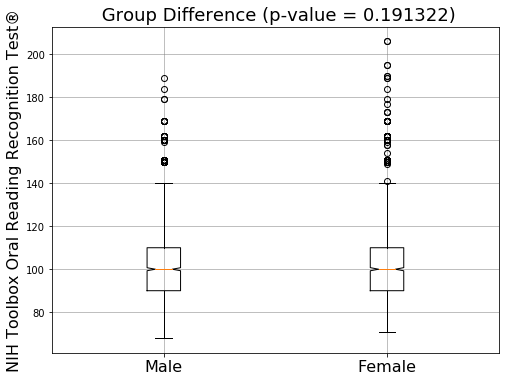

In [411]:
        
[sss, p] = stats.ttest_ind(fvv, mvv)
print ('f = %.2f +/- %.2f\nm = %.2f +/- %.2f\np = %.10f' % (np.mean(fvv), np.std(fvv), np.mean(mvv), np.std(mvv), p))

data_to_plot = [mvv, fvv]
fig2 = plt.figure(2, figsize=(8, 6))
plt.grid(color='grey', linestyle='-', linewidth=0.5)
bp = plt.boxplot(data_to_plot, notch=True)
plt.xticks([1, 2], ['Male', 'Female'], fontsize=16)
plt.ylabel(s, fontsize=16) 
plt.title((' Group Difference (p-value = %f)' % p), fontsize=18)

fig2.savefig('plots/' + ss + 'groupdiff.eps', format='eps', dpi=300)
fig2.savefig('plots/' + ss + 'groupdiff.jpg', format='jpg', dpi=300)      


In [493]:
import statsmodels.api as sm

cts = ['pea_wiscv_trs',\
       'pea_ravlt_sd_trial_v_tc',\
       'lmt_scr_perc_correct',\
       'cash_choice_task',\
       'nihtbx_picvocab_agecorrected',\
       'nihtbx_reading_agecorrected',\
       'nihtbx_flanker_agecorrected',\
       'nihtbx_list_agecorrected',\
       'nihtbx_cardsort_agecorrected',\
       'nihtbx_pattern_agecorrected',\
       'nihtbx_picture_agecorrected']
ctns = ['WISC-V Matrix Reasoning Total Raw Score',\
        'RAVLT Short Delay Trial V Total Correct',\
        'Little Man Task Accuracy',\
        'Cash Choice Task',\
        'NIH Toolbox Picture Vocabulary Test®',\
        'NIH Toolbox Oral Reading Recognition Test®',\
        'NIH Toolbox Flanker®',\
        'NIH Toolbox List Sorting Working Memory Test®',\
        'NIH Toolbox Dimensional Change Card Sort®',\
        'NIH Toolbox Pattern Comparison Processing Speed®',\
        'NIH Toolbox Picture Sequence Memory Test®']

for (ct, s) in zip(cts, ctns):
    # fvec = np.array(all_info3[ss][sex==1], dtype=np.float64)
    # mvec = np.array(all_info3[ss][sex==0], dtype=np.float64)
    fvec = all_info3[ct][sex==1]
    mvec = all_info3[ct][sex==0]
    fpred = np.array(all_info3['pred'][sex==1], dtype=np.float64)
    mpred = np.array(all_info3['pred'][sex==0], dtype=np.float64)
    fnan = np.isnan(np.array(fvec.values, dtype=np.float64))
    mnan = np.isnan(np.array(mvec.values, dtype=np.float64))
    fvec = fvec[~fnan]
    mvec = mvec[~mnan]
    fpred = fpred[~fnan]
    mpred = mpred[~mnan]
    fct = np.array(fvec.values, dtype=np.float64)
    mct = np.array(mvec.values, dtype=np.float64)
    meanfvec = np.mean(fct)
    meanmvec = np.mean(mct)
    
    CT = np.concatenate([fct, mct])
    S = np.concatenate([fpred, mpred])
    Sex = np.concatenate([np.ones(fpred.shape[0]), np.zeros(mpred.shape[0])])
    
    #[t, p] = stats.ttest_ind(CT, S) 
    [t, p] = pearsonr(CT, S) 
    print ('%s\nS  <->CT: \t\t corr=%2.20f \t p=%2.20f' % (ct, t, p))
    #[t, p] = stats.ttest_ind(CT, Sex) 
    [t, p] = pearsonr(CT, Sex) 
    print ('Sex<->CT: \t\t corr=%2.20f \t p=%2.20f' % (t, p))
    
    X = np.zeros((S.shape[0],3))
    X[:,0]= S
    X[:,1]= Sex   
    X[:,2] = 1
    glm_model = sm.GLM(CT,X)
    glm_results = glm_model.fit()
    p = glm_results.pvalues
    print ('GLM p-values S: %f Sex:%f' % (p[0], p[1]))



pea_wiscv_trs
S  <->CT: 		 corr=0.02346602994383184190 	 p=0.15366319683989615452
Sex<->CT: 		 corr=0.06253049316008302272 	 p=0.00014180905680753983
GLM p-values S: 0.000974 Sex:0.000001
pea_ravlt_sd_trial_v_tc
S  <->CT: 		 corr=0.08152380333578419791 	 p=0.00000047331761901848
Sex<->CT: 		 corr=0.10947486429407804476 	 p=0.00000000001262759087
GLM p-values S: 0.218640 Sex:0.000003
lmt_scr_perc_correct
S  <->CT: 		 corr=-0.07916731052448336414 	 p=0.00000086435906461683
Sex<->CT: 		 corr=-0.07928350078458057393 	 p=0.00000083293064483239
GLM p-values S: 0.152660 Sex:0.145687
cash_choice_task
S  <->CT: 		 corr=0.02433044710814840500 	 p=0.13124727791930207443
Sex<->CT: 		 corr=0.04322837341895678642 	 p=0.00731212754543905490
GLM p-values S: 0.163821 Sex:0.008812
nihtbx_picvocab_agecorrected
S  <->CT: 		 corr=-0.03476577450761660776 	 p=0.03090978630439710981
Sex<->CT: 		 corr=-0.02425349064208340982 	 p=0.13222022058802498923
GLM p-values S: 0.098526 Sex:0.561639
nihtbx_reading_agecor

In [488]:
volums_scores = pd.read_csv('../all_vol_scores.csv')
all_vol = volums_scores[volums_scores.subjectkey.isin(all_subjects)]
dfs2 = [all_info3, all_vol]
all_info4 = reduce(lambda left,right: pd.merge(left,right,on='subjectkey'), dfs2)

In [492]:
hippo = np.array(all_info4['sri24_parc116_hippocampus_l_gm'][:], dtype=np.float64) + \
np.array(all_info4['sri24_parc116_hippocampus_r_gm'][:], dtype=np.float64)

rvlt = np.array(all_info4['pea_ravlt_sd_trial_v_tc'][:], dtype=np.float64)

hnan = np.isnan(hippo)
rnan = np.isnan(rvlt)
hippo = hippo[~(hnan | rnan)]
rvlt = rvlt[~(hnan | rnan)]

[t, p] = pearsonr(hippo, rvlt) 
print ('hippo<->rvlt: \t\t corr=%2.20f \t p=%2.20f' % (t, p))


hippo<->rvlt: 		 corr=0.05334511725786057063 	 p=0.00099228558866936573


In [489]:
namee = 'hippocampus'
for s in all_info4.columns[:]:
    if isinstance(s, str) and namee.lower() in s.lower():
        print (s)

sri24_parc116_hippocampus_l_gm
sri24_parc116_hippocampus_r_gm
